## Advisory 
### If you have not yet begun the project 
Please do not use this workspace.  Use the AWS resources provided and the instructions from the [cloud computing lesson](https://classroom.udacity.com/nanodegrees/nd101/parts/b9c4c3c3-b524-427b-8832-9d0748f14a2e/modules/de12f7bf-d980-4998-ab91-0e411184c878/lessons/29df00d8-01c2-4995-92fa-a4afd020be90/concepts/80d2ed46-1bba-413e-891e-610259017251).
### If you have started on this workspace
Please consider downloading your Jupyter notebook and then following the instructions above on using AWS instead.  You can upload your current work to AWS through your GitHub account.  


As a reminder, the project can be found on the [deep learning GitHub page](https://github.com/udacity/deep-learning/tree/master/face_generation).
These warnings are given because the project frequently generates more data than the workspace can handle, causing loading problems and lost work.  Please use [the forums](https://discussions.udacity.com/c/nd101-part-5-GANs/nd101-generate-faces) if you have any questions on the project or its setup.


# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [2]:
#!pip uninstall matplotlib -y
!pip install matplotlib==2.0.2

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


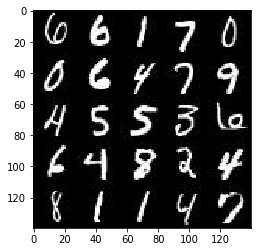

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

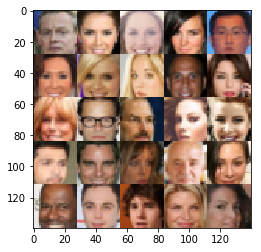

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * layer1, layer1)
        # 16x16x64
        
        layer2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        batch_n2 = tf.layers.batch_normalization(layer2, training=True)
        relu2 = tf.maximum(alpha * batch_n2, batch_n2)
        # 8x8x128
        
        layer3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        batch_n3 = tf.layers.batch_normalization(layer3, training=True)
        relu3 = tf.maximum(alpha * batch_n3, batch_n3)
        # 4x4x256
        
        #layer4 = tf.layers.conv2d(relu3, 512, 5, strides=2, padding='same')
        #batch_n4 = tf.layers.batch_normalization(layer4, training=True)
        #relu4 = tf.maximum(alpha * batch_n4, batch_n4)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def old_generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """

    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        # First fully connected layer
        
        layer1 = tf.layers.dense(z,7*7*1024)
        layer1 = tf.reshape(layer1,shape=(-1,7,7,1024))
        layer1 = tf.layers.batch_normalization(layer1,training=is_train) 
        layer1 = tf.maximum(0.2*layer1,layer1) #leaky relu
        
        layer2 = tf.layers.conv2d_transpose(layer1,512,5,strides=2,padding='same')
        layer2 = tf.layers.batch_normalization(layer2,training=is_train)
        layer2 = tf.maximum(0.2*layer2,layer2)


        layer3 = tf.layers.conv2d_transpose(layer2,256,5,strides=2,padding='same')
        layer3 = tf.layers.batch_normalization(layer3,training=is_train)
        layer3 = tf.maximum(0.2*layer3,layer3)

        layer4 = tf.layers.conv2d_transpose(layer3,64,5,strides=1,padding='same')
        layer4 = tf.layers.batch_normalization(layer4,training=is_train)
        layer4 = tf.maximum(0.2*layer4,layer4)
        
        
        # Output layer
        logits = tf.layers.conv2d_transpose(layer4, out_channel_dim, 5, strides=1, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(old_generator, tf)

Tests Passed


In [9]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """

    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        # First fully connected layer
        
        layer1 = tf.layers.dense(z,7*7*512)
        layer1 = tf.reshape(layer1,shape=(-1,7,7,512))
        layer1 = tf.layers.batch_normalization(layer1,training=is_train) 
        layer1 = tf.maximum(0.2*layer1,layer1) #leaky relu
        
        layer2 = tf.layers.conv2d_transpose(layer1,256,5,strides=2,padding='same')
        layer2 = tf.layers.batch_normalization(layer2,training=is_train)
        layer2 = tf.maximum(0.2*layer2,layer2)


        layer3 = tf.layers.conv2d_transpose(layer2,128,5,strides=2,padding='same')
        layer3 = tf.layers.batch_normalization(layer3,training=is_train)
        layer3 = tf.maximum(0.2*layer3,layer3)
        
        
        # Output layer
        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides=1, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    alpha = 0.02

    input_real, input_z, lr = model_inputs(data_shape[1],data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3], alpha=alpha)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()
    
    samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Normalize images
                batch_images = batch_images * 2
                # TODO: Train Model
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr:learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i +1,epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 200 == 0:
                    # sess, n_images, input_z, out_channel_dim, image_mode
                    show_generator_output(sess, 25, input_z, data_shape[3] , data_image_mode )
                
        saver.save(sess, './checkpoints/generator.ckpt')

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    return losses, samples
    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 4.5651... Generator Loss: 9.8420
Epoch 1/2... Discriminator Loss: 1.4161... Generator Loss: 2.5601
Epoch 1/2... Discriminator Loss: 1.4738... Generator Loss: 0.5442
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 0.9444
Epoch 1/2... Discriminator Loss: 1.2565... Generator Loss: 0.9469
Epoch 1/2... Discriminator Loss: 1.3215... Generator Loss: 0.9565
Epoch 1/2... Discriminator Loss: 1.5173... Generator Loss: 0.4379
Epoch 1/2... Discriminator Loss: 1.4261... Generator Loss: 0.5969
Epoch 1/2... Discriminator Loss: 1.3912... Generator Loss: 1.5599
Epoch 1/2... Discriminator Loss: 1.1728... Generator Loss: 1.7213
Epoch 1/2... Discriminator Loss: 1.2816... Generator Loss: 0.8736
Epoch 1/2... Discriminator Loss: 1.2938... Generator Loss: 0.7566
Epoch 1/2... Discriminator Loss: 1.2158... Generator Loss: 0.6471
Epoch 1/2... Discriminator Loss: 1.3074... Generator Loss: 0.6665
Epoch 1/2... Discriminator Loss: 1.1926... Generator Loss: 0.8267
Epoch 1/2.

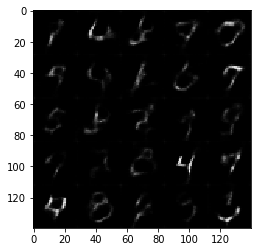

Epoch 1/2... Discriminator Loss: 1.2740... Generator Loss: 0.9363
Epoch 1/2... Discriminator Loss: 1.3265... Generator Loss: 0.9820
Epoch 1/2... Discriminator Loss: 1.3176... Generator Loss: 1.0042
Epoch 1/2... Discriminator Loss: 1.5611... Generator Loss: 0.4292
Epoch 1/2... Discriminator Loss: 1.3090... Generator Loss: 0.6918
Epoch 1/2... Discriminator Loss: 1.5518... Generator Loss: 0.4322
Epoch 1/2... Discriminator Loss: 1.2499... Generator Loss: 0.7197
Epoch 1/2... Discriminator Loss: 1.5227... Generator Loss: 1.6040
Epoch 1/2... Discriminator Loss: 1.3373... Generator Loss: 0.8177
Epoch 1/2... Discriminator Loss: 1.2123... Generator Loss: 0.9599
Epoch 1/2... Discriminator Loss: 1.4392... Generator Loss: 0.5007
Epoch 1/2... Discriminator Loss: 1.3146... Generator Loss: 0.9312
Epoch 1/2... Discriminator Loss: 1.3170... Generator Loss: 0.6784
Epoch 1/2... Discriminator Loss: 1.2963... Generator Loss: 0.6522
Epoch 1/2... Discriminator Loss: 1.2282... Generator Loss: 1.0174
Epoch 1/2.

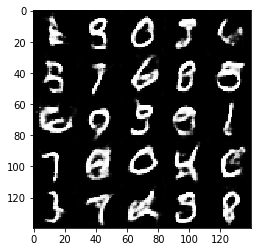

Epoch 1/2... Discriminator Loss: 1.2510... Generator Loss: 0.6971
Epoch 1/2... Discriminator Loss: 1.6143... Generator Loss: 0.3712
Epoch 1/2... Discriminator Loss: 1.1276... Generator Loss: 1.0126
Epoch 1/2... Discriminator Loss: 1.1513... Generator Loss: 1.0543
Epoch 1/2... Discriminator Loss: 1.2160... Generator Loss: 1.1201
Epoch 1/2... Discriminator Loss: 1.1919... Generator Loss: 1.5153
Epoch 1/2... Discriminator Loss: 1.1650... Generator Loss: 0.7589
Epoch 1/2... Discriminator Loss: 1.2400... Generator Loss: 1.5099
Epoch 1/2... Discriminator Loss: 1.2087... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 1.1323... Generator Loss: 0.8643
Epoch 1/2... Discriminator Loss: 1.3650... Generator Loss: 0.5371
Epoch 1/2... Discriminator Loss: 1.2579... Generator Loss: 0.6634
Epoch 1/2... Discriminator Loss: 1.1493... Generator Loss: 0.7135
Epoch 1/2... Discriminator Loss: 1.2791... Generator Loss: 0.6555
Epoch 1/2... Discriminator Loss: 1.6004... Generator Loss: 0.3970
Epoch 1/2.

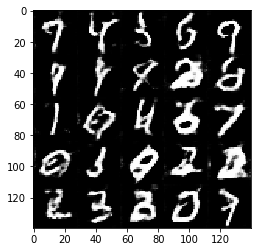

Epoch 1/2... Discriminator Loss: 1.2510... Generator Loss: 0.8402
Epoch 1/2... Discriminator Loss: 1.3889... Generator Loss: 0.5081
Epoch 1/2... Discriminator Loss: 1.0179... Generator Loss: 1.2232
Epoch 1/2... Discriminator Loss: 1.1976... Generator Loss: 0.8964
Epoch 1/2... Discriminator Loss: 1.1260... Generator Loss: 0.9822
Epoch 1/2... Discriminator Loss: 1.0879... Generator Loss: 0.8032
Epoch 1/2... Discriminator Loss: 1.5969... Generator Loss: 0.4301
Epoch 1/2... Discriminator Loss: 1.0959... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 1.2387... Generator Loss: 1.9077
Epoch 1/2... Discriminator Loss: 1.0130... Generator Loss: 1.1512
Epoch 1/2... Discriminator Loss: 1.1355... Generator Loss: 0.8740
Epoch 1/2... Discriminator Loss: 1.0374... Generator Loss: 0.9528
Epoch 1/2... Discriminator Loss: 1.2022... Generator Loss: 1.0239
Epoch 1/2... Discriminator Loss: 1.2406... Generator Loss: 0.8051
Epoch 1/2... Discriminator Loss: 1.1328... Generator Loss: 0.9563
Epoch 1/2.

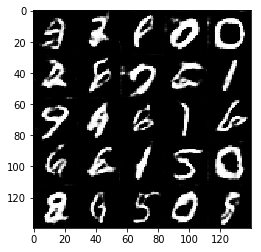

Epoch 1/2... Discriminator Loss: 0.9753... Generator Loss: 0.9833
Epoch 1/2... Discriminator Loss: 1.5245... Generator Loss: 0.4354
Epoch 1/2... Discriminator Loss: 1.0145... Generator Loss: 0.9819
Epoch 1/2... Discriminator Loss: 1.2643... Generator Loss: 0.6187
Epoch 1/2... Discriminator Loss: 1.0079... Generator Loss: 0.8744
Epoch 1/2... Discriminator Loss: 2.1182... Generator Loss: 3.1469
Epoch 1/2... Discriminator Loss: 0.8800... Generator Loss: 1.2984
Epoch 1/2... Discriminator Loss: 1.0078... Generator Loss: 1.3336
Epoch 1/2... Discriminator Loss: 1.5869... Generator Loss: 1.4827
Epoch 1/2... Discriminator Loss: 1.1618... Generator Loss: 1.4854
Epoch 1/2... Discriminator Loss: 1.0404... Generator Loss: 0.9936
Epoch 1/2... Discriminator Loss: 0.9970... Generator Loss: 1.0301
Epoch 1/2... Discriminator Loss: 1.0580... Generator Loss: 0.9803
Epoch 1/2... Discriminator Loss: 0.9769... Generator Loss: 1.0128
Epoch 1/2... Discriminator Loss: 1.2145... Generator Loss: 0.7148
Epoch 1/2.

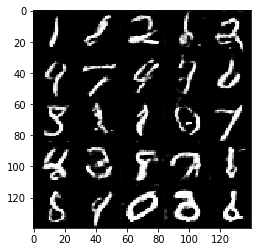

Epoch 1/2... Discriminator Loss: 0.8596... Generator Loss: 1.0937
Epoch 1/2... Discriminator Loss: 1.6498... Generator Loss: 0.3787
Epoch 1/2... Discriminator Loss: 0.9479... Generator Loss: 0.9685
Epoch 1/2... Discriminator Loss: 1.2960... Generator Loss: 0.5609
Epoch 1/2... Discriminator Loss: 1.3838... Generator Loss: 0.5317
Epoch 1/2... Discriminator Loss: 1.9190... Generator Loss: 0.2715
Epoch 1/2... Discriminator Loss: 0.9228... Generator Loss: 1.0445
Epoch 1/2... Discriminator Loss: 1.1268... Generator Loss: 0.8506
Epoch 1/2... Discriminator Loss: 0.9058... Generator Loss: 1.5529
Epoch 1/2... Discriminator Loss: 1.1406... Generator Loss: 0.7424
Epoch 1/2... Discriminator Loss: 1.2139... Generator Loss: 0.6354
Epoch 1/2... Discriminator Loss: 0.8964... Generator Loss: 1.0448
Epoch 1/2... Discriminator Loss: 1.1225... Generator Loss: 0.7374
Epoch 1/2... Discriminator Loss: 0.8862... Generator Loss: 1.1906
Epoch 1/2... Discriminator Loss: 1.3018... Generator Loss: 0.7306
Epoch 1/2.

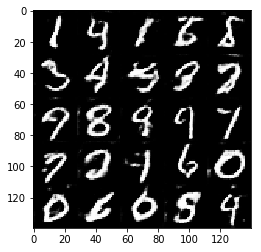

Epoch 1/2... Discriminator Loss: 1.2782... Generator Loss: 0.6027
Epoch 1/2... Discriminator Loss: 1.1454... Generator Loss: 2.0061
Epoch 1/2... Discriminator Loss: 0.9052... Generator Loss: 1.2255
Epoch 1/2... Discriminator Loss: 0.9383... Generator Loss: 1.1583
Epoch 1/2... Discriminator Loss: 0.9034... Generator Loss: 2.1270
Epoch 1/2... Discriminator Loss: 0.9191... Generator Loss: 1.1427
Epoch 1/2... Discriminator Loss: 1.0138... Generator Loss: 0.9489
Epoch 1/2... Discriminator Loss: 1.0830... Generator Loss: 0.7664
Epoch 1/2... Discriminator Loss: 0.9926... Generator Loss: 1.1432
Epoch 1/2... Discriminator Loss: 1.1302... Generator Loss: 2.1695
Epoch 1/2... Discriminator Loss: 1.2516... Generator Loss: 0.7247
Epoch 1/2... Discriminator Loss: 0.9702... Generator Loss: 0.9320
Epoch 1/2... Discriminator Loss: 0.9053... Generator Loss: 1.8916
Epoch 1/2... Discriminator Loss: 0.7725... Generator Loss: 1.3342
Epoch 1/2... Discriminator Loss: 0.9420... Generator Loss: 1.0466
Epoch 1/2.

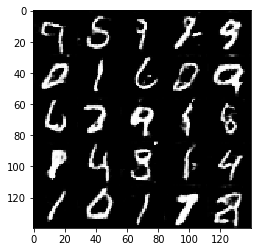

Epoch 1/2... Discriminator Loss: 1.4097... Generator Loss: 0.4921
Epoch 1/2... Discriminator Loss: 0.9466... Generator Loss: 1.2467
Epoch 1/2... Discriminator Loss: 0.8468... Generator Loss: 1.7380
Epoch 1/2... Discriminator Loss: 1.1355... Generator Loss: 0.6869
Epoch 1/2... Discriminator Loss: 1.2514... Generator Loss: 0.6573
Epoch 1/2... Discriminator Loss: 1.5099... Generator Loss: 0.4776
Epoch 1/2... Discriminator Loss: 1.2208... Generator Loss: 1.0214
Epoch 1/2... Discriminator Loss: 1.1788... Generator Loss: 0.7086
Epoch 1/2... Discriminator Loss: 0.8246... Generator Loss: 1.2598
Epoch 1/2... Discriminator Loss: 1.0693... Generator Loss: 0.8184
Epoch 1/2... Discriminator Loss: 1.7543... Generator Loss: 0.3743
Epoch 1/2... Discriminator Loss: 0.8325... Generator Loss: 1.1788
Epoch 1/2... Discriminator Loss: 0.7875... Generator Loss: 1.9536
Epoch 1/2... Discriminator Loss: 1.1530... Generator Loss: 0.7572
Epoch 1/2... Discriminator Loss: 1.0796... Generator Loss: 0.8922
Epoch 1/2.

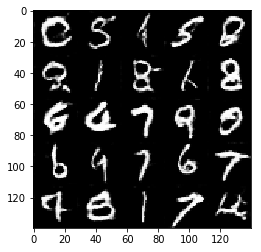

Epoch 1/2... Discriminator Loss: 0.8063... Generator Loss: 1.5110
Epoch 1/2... Discriminator Loss: 0.8481... Generator Loss: 1.3934
Epoch 1/2... Discriminator Loss: 0.8534... Generator Loss: 1.1680
Epoch 1/2... Discriminator Loss: 0.7879... Generator Loss: 1.9146
Epoch 1/2... Discriminator Loss: 0.8612... Generator Loss: 1.3176
Epoch 1/2... Discriminator Loss: 0.6848... Generator Loss: 1.7157
Epoch 1/2... Discriminator Loss: 0.9478... Generator Loss: 0.9235
Epoch 1/2... Discriminator Loss: 0.9883... Generator Loss: 1.9815
Epoch 1/2... Discriminator Loss: 0.9812... Generator Loss: 0.9801
Epoch 1/2... Discriminator Loss: 0.6280... Generator Loss: 1.6913
Epoch 1/2... Discriminator Loss: 1.2620... Generator Loss: 2.1911
Epoch 1/2... Discriminator Loss: 0.8406... Generator Loss: 1.5881
Epoch 1/2... Discriminator Loss: 0.7837... Generator Loss: 1.6669
Epoch 1/2... Discriminator Loss: 0.9616... Generator Loss: 2.1160
Epoch 1/2... Discriminator Loss: 0.8363... Generator Loss: 1.1265
Epoch 1/2.

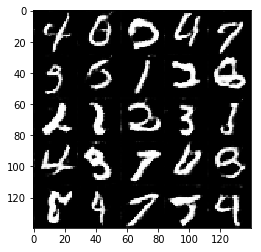

Epoch 1/2... Discriminator Loss: 1.0759... Generator Loss: 0.8007
Epoch 1/2... Discriminator Loss: 0.8315... Generator Loss: 1.3995
Epoch 1/2... Discriminator Loss: 1.7768... Generator Loss: 3.4718
Epoch 1/2... Discriminator Loss: 1.2224... Generator Loss: 0.7242
Epoch 1/2... Discriminator Loss: 0.8167... Generator Loss: 1.2314
Epoch 1/2... Discriminator Loss: 0.8843... Generator Loss: 1.6242
Epoch 1/2... Discriminator Loss: 1.5200... Generator Loss: 0.4573
Epoch 2/2... Discriminator Loss: 0.4651... Generator Loss: 2.5846
Epoch 2/2... Discriminator Loss: 1.2442... Generator Loss: 0.6436
Epoch 2/2... Discriminator Loss: 1.1579... Generator Loss: 0.7273
Epoch 2/2... Discriminator Loss: 0.8502... Generator Loss: 1.4184
Epoch 2/2... Discriminator Loss: 1.3377... Generator Loss: 1.3620
Epoch 2/2... Discriminator Loss: 0.6100... Generator Loss: 1.7130
Epoch 2/2... Discriminator Loss: 0.9713... Generator Loss: 1.0436
Epoch 2/2... Discriminator Loss: 0.9746... Generator Loss: 2.8207
Epoch 2/2.

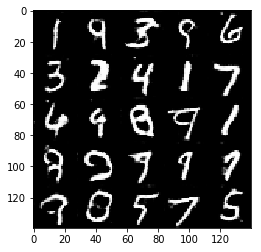

Epoch 2/2... Discriminator Loss: 1.4131... Generator Loss: 0.5009
Epoch 2/2... Discriminator Loss: 1.0804... Generator Loss: 0.9973
Epoch 2/2... Discriminator Loss: 0.8655... Generator Loss: 1.0286
Epoch 2/2... Discriminator Loss: 0.9102... Generator Loss: 1.0345
Epoch 2/2... Discriminator Loss: 1.7801... Generator Loss: 0.3623
Epoch 2/2... Discriminator Loss: 1.1951... Generator Loss: 0.6873
Epoch 2/2... Discriminator Loss: 1.5386... Generator Loss: 0.4365
Epoch 2/2... Discriminator Loss: 0.6032... Generator Loss: 2.0426
Epoch 2/2... Discriminator Loss: 0.7846... Generator Loss: 1.1727
Epoch 2/2... Discriminator Loss: 0.8290... Generator Loss: 1.4130
Epoch 2/2... Discriminator Loss: 0.7507... Generator Loss: 1.2942
Epoch 2/2... Discriminator Loss: 0.6971... Generator Loss: 1.6435
Epoch 2/2... Discriminator Loss: 0.7900... Generator Loss: 1.7806
Epoch 2/2... Discriminator Loss: 0.7065... Generator Loss: 1.3723
Epoch 2/2... Discriminator Loss: 1.0877... Generator Loss: 0.8916
Epoch 2/2.

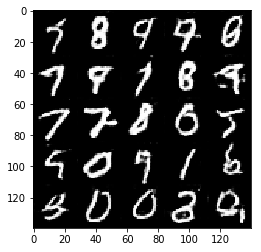

Epoch 2/2... Discriminator Loss: 0.8100... Generator Loss: 1.2967
Epoch 2/2... Discriminator Loss: 0.8414... Generator Loss: 1.0958
Epoch 2/2... Discriminator Loss: 0.8557... Generator Loss: 1.1083
Epoch 2/2... Discriminator Loss: 0.7775... Generator Loss: 1.1693
Epoch 2/2... Discriminator Loss: 0.7795... Generator Loss: 1.1940
Epoch 2/2... Discriminator Loss: 0.4616... Generator Loss: 2.4473
Epoch 2/2... Discriminator Loss: 0.8422... Generator Loss: 1.1418
Epoch 2/2... Discriminator Loss: 1.1074... Generator Loss: 0.8816
Epoch 2/2... Discriminator Loss: 0.8705... Generator Loss: 1.6179
Epoch 2/2... Discriminator Loss: 0.6935... Generator Loss: 1.4928
Epoch 2/2... Discriminator Loss: 0.7095... Generator Loss: 1.4089
Epoch 2/2... Discriminator Loss: 1.2534... Generator Loss: 0.7463
Epoch 2/2... Discriminator Loss: 1.7927... Generator Loss: 0.3487
Epoch 2/2... Discriminator Loss: 0.7832... Generator Loss: 2.3574
Epoch 2/2... Discriminator Loss: 0.6894... Generator Loss: 2.3640
Epoch 2/2.

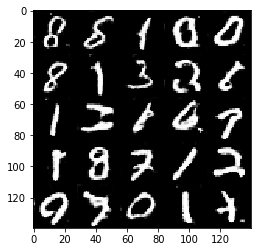

Epoch 2/2... Discriminator Loss: 1.3078... Generator Loss: 0.5864
Epoch 2/2... Discriminator Loss: 1.4584... Generator Loss: 0.5589
Epoch 2/2... Discriminator Loss: 0.8036... Generator Loss: 1.2854
Epoch 2/2... Discriminator Loss: 1.2592... Generator Loss: 0.7666
Epoch 2/2... Discriminator Loss: 0.6667... Generator Loss: 2.2917
Epoch 2/2... Discriminator Loss: 0.5237... Generator Loss: 2.7454
Epoch 2/2... Discriminator Loss: 0.7423... Generator Loss: 1.4302
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 0.9585
Epoch 2/2... Discriminator Loss: 1.2447... Generator Loss: 0.6943
Epoch 2/2... Discriminator Loss: 0.5246... Generator Loss: 2.8925
Epoch 2/2... Discriminator Loss: 0.7137... Generator Loss: 2.4416
Epoch 2/2... Discriminator Loss: 0.7932... Generator Loss: 1.3529
Epoch 2/2... Discriminator Loss: 0.9091... Generator Loss: 2.1926
Epoch 2/2... Discriminator Loss: 0.9570... Generator Loss: 0.9913
Epoch 2/2... Discriminator Loss: 0.8106... Generator Loss: 1.1706
Epoch 2/2.

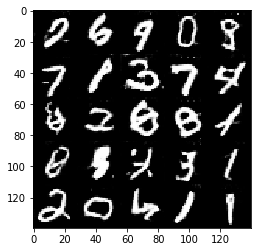

Epoch 2/2... Discriminator Loss: 1.0695... Generator Loss: 0.9375
Epoch 2/2... Discriminator Loss: 0.9735... Generator Loss: 1.0093
Epoch 2/2... Discriminator Loss: 0.6794... Generator Loss: 1.4313
Epoch 2/2... Discriminator Loss: 1.3898... Generator Loss: 0.5959
Epoch 2/2... Discriminator Loss: 1.0619... Generator Loss: 0.8938
Epoch 2/2... Discriminator Loss: 1.1247... Generator Loss: 3.7574
Epoch 2/2... Discriminator Loss: 0.8267... Generator Loss: 1.2213
Epoch 2/2... Discriminator Loss: 1.5940... Generator Loss: 0.4853
Epoch 2/2... Discriminator Loss: 0.5390... Generator Loss: 2.0596
Epoch 2/2... Discriminator Loss: 1.1320... Generator Loss: 0.9033
Epoch 2/2... Discriminator Loss: 0.7060... Generator Loss: 1.4223
Epoch 2/2... Discriminator Loss: 1.4823... Generator Loss: 0.5407
Epoch 2/2... Discriminator Loss: 0.5584... Generator Loss: 1.8437
Epoch 2/2... Discriminator Loss: 0.6122... Generator Loss: 1.6945
Epoch 2/2... Discriminator Loss: 0.8604... Generator Loss: 1.3269
Epoch 2/2.

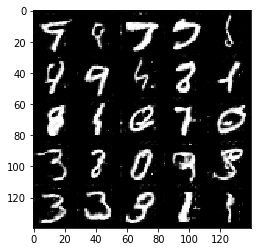

Epoch 2/2... Discriminator Loss: 0.6895... Generator Loss: 1.4726
Epoch 2/2... Discriminator Loss: 1.1406... Generator Loss: 2.9030
Epoch 2/2... Discriminator Loss: 0.7761... Generator Loss: 1.2498
Epoch 2/2... Discriminator Loss: 0.4934... Generator Loss: 2.2748
Epoch 2/2... Discriminator Loss: 0.7905... Generator Loss: 1.2070
Epoch 2/2... Discriminator Loss: 0.6040... Generator Loss: 2.0646
Epoch 2/2... Discriminator Loss: 1.4599... Generator Loss: 0.6242
Epoch 2/2... Discriminator Loss: 0.8723... Generator Loss: 2.0621
Epoch 2/2... Discriminator Loss: 0.9083... Generator Loss: 1.0169
Epoch 2/2... Discriminator Loss: 0.6581... Generator Loss: 1.5501
Epoch 2/2... Discriminator Loss: 0.5624... Generator Loss: 1.9050
Epoch 2/2... Discriminator Loss: 0.8573... Generator Loss: 3.3201
Epoch 2/2... Discriminator Loss: 0.6495... Generator Loss: 1.8090
Epoch 2/2... Discriminator Loss: 1.3736... Generator Loss: 0.5732
Epoch 2/2... Discriminator Loss: 0.8634... Generator Loss: 1.2463
Epoch 2/2.

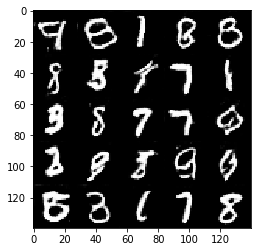

Epoch 2/2... Discriminator Loss: 1.3534... Generator Loss: 0.5614
Epoch 2/2... Discriminator Loss: 1.4790... Generator Loss: 0.4977
Epoch 2/2... Discriminator Loss: 0.6252... Generator Loss: 1.7925
Epoch 2/2... Discriminator Loss: 0.6436... Generator Loss: 1.9980
Epoch 2/2... Discriminator Loss: 0.6844... Generator Loss: 1.4897
Epoch 2/2... Discriminator Loss: 1.3478... Generator Loss: 0.6435
Epoch 2/2... Discriminator Loss: 0.7067... Generator Loss: 1.4130
Epoch 2/2... Discriminator Loss: 0.5585... Generator Loss: 1.9682
Epoch 2/2... Discriminator Loss: 0.6851... Generator Loss: 1.9737
Epoch 2/2... Discriminator Loss: 0.7284... Generator Loss: 1.5587
Epoch 2/2... Discriminator Loss: 0.6038... Generator Loss: 1.6520
Epoch 2/2... Discriminator Loss: 0.4157... Generator Loss: 3.1194
Epoch 2/2... Discriminator Loss: 0.5322... Generator Loss: 2.0112
Epoch 2/2... Discriminator Loss: 0.4993... Generator Loss: 2.2807
Epoch 2/2... Discriminator Loss: 0.6023... Generator Loss: 1.6857
Epoch 2/2.

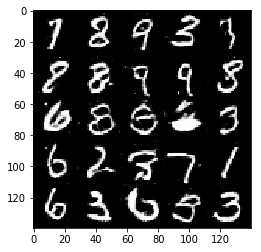

Epoch 2/2... Discriminator Loss: 0.5320... Generator Loss: 2.1896
Epoch 2/2... Discriminator Loss: 0.4923... Generator Loss: 2.2174
Epoch 2/2... Discriminator Loss: 0.5252... Generator Loss: 2.3691
Epoch 2/2... Discriminator Loss: 0.7356... Generator Loss: 1.4171
Epoch 2/2... Discriminator Loss: 1.7961... Generator Loss: 0.4302
Epoch 2/2... Discriminator Loss: 0.6142... Generator Loss: 1.7094
Epoch 2/2... Discriminator Loss: 1.0393... Generator Loss: 0.9389
Epoch 2/2... Discriminator Loss: 0.4711... Generator Loss: 2.2834
Epoch 2/2... Discriminator Loss: 0.7827... Generator Loss: 2.4356
Epoch 2/2... Discriminator Loss: 0.9256... Generator Loss: 1.0218
Epoch 2/2... Discriminator Loss: 0.5953... Generator Loss: 2.0782
Epoch 2/2... Discriminator Loss: 1.5640... Generator Loss: 0.5537
Epoch 2/2... Discriminator Loss: 0.5462... Generator Loss: 1.9531
Epoch 2/2... Discriminator Loss: 0.6065... Generator Loss: 1.6547
Epoch 2/2... Discriminator Loss: 0.4832... Generator Loss: 2.3058
Epoch 2/2.

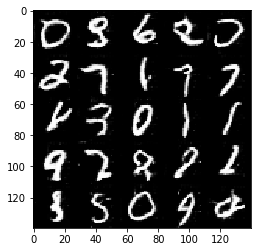

Epoch 2/2... Discriminator Loss: 0.5800... Generator Loss: 1.7399
Epoch 2/2... Discriminator Loss: 0.5483... Generator Loss: 1.9965
Epoch 2/2... Discriminator Loss: 0.5760... Generator Loss: 1.7643
Epoch 2/2... Discriminator Loss: 0.4291... Generator Loss: 3.3772
Epoch 2/2... Discriminator Loss: 0.4850... Generator Loss: 2.4853
Epoch 2/2... Discriminator Loss: 0.8080... Generator Loss: 1.1419
Epoch 2/2... Discriminator Loss: 0.5144... Generator Loss: 2.0005
Epoch 2/2... Discriminator Loss: 0.4501... Generator Loss: 2.6036
Epoch 2/2... Discriminator Loss: 0.4412... Generator Loss: 2.6197
Epoch 2/2... Discriminator Loss: 0.5076... Generator Loss: 2.2681
Epoch 2/2... Discriminator Loss: 1.1854... Generator Loss: 0.9556
Epoch 2/2... Discriminator Loss: 1.1108... Generator Loss: 0.8454
Epoch 2/2... Discriminator Loss: 0.6050... Generator Loss: 1.6656
Epoch 2/2... Discriminator Loss: 0.6260... Generator Loss: 1.5818
Epoch 2/2... Discriminator Loss: 0.4807... Generator Loss: 2.3270
Epoch 2/2.

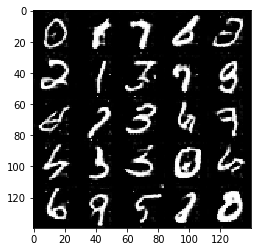

Epoch 2/2... Discriminator Loss: 1.1424... Generator Loss: 0.7394
Epoch 2/2... Discriminator Loss: 0.8607... Generator Loss: 1.1530
Epoch 2/2... Discriminator Loss: 1.1693... Generator Loss: 0.7544
Epoch 2/2... Discriminator Loss: 0.5889... Generator Loss: 1.6737
Epoch 2/2... Discriminator Loss: 0.7544... Generator Loss: 1.2974
Epoch 2/2... Discriminator Loss: 0.7039... Generator Loss: 2.1669
Epoch 2/2... Discriminator Loss: 0.8727... Generator Loss: 1.0960
Epoch 2/2... Discriminator Loss: 0.4942... Generator Loss: 2.4525
Epoch 2/2... Discriminator Loss: 0.6990... Generator Loss: 1.4574
Epoch 2/2... Discriminator Loss: 1.2135... Generator Loss: 0.8305
Epoch 2/2... Discriminator Loss: 0.5709... Generator Loss: 1.9286
Epoch 2/2... Discriminator Loss: 0.7775... Generator Loss: 2.2856
Epoch 2/2... Discriminator Loss: 0.6049... Generator Loss: 1.6545
Epoch 2/2... Discriminator Loss: 0.7256... Generator Loss: 1.3288
Epoch 2/2... Discriminator Loss: 0.6300... Generator Loss: 1.6665


In [ ]:
import pickle as pkl

batch_size = 32
z_dim = 80
learning_rate = 0.0006
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4986... Generator Loss: 2.0672
Epoch 1/1... Discriminator Loss: 2.0474... Generator Loss: 12.2708
Epoch 1/1... Discriminator Loss: 0.7923... Generator Loss: 2.5765
Epoch 1/1... Discriminator Loss: 0.5712... Generator Loss: 1.8857
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 3.9173
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 1.0549
Epoch 1/1... Discriminator Loss: 0.5719... Generator Loss: 1.7213
Epoch 1/1... Discriminator Loss: 1.2030... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.7180... Generator Loss: 2.3533
Epoch 1/1... Discriminator Loss: 1.5654... Generator Loss: 0.4322
Epoch 1/1... Discriminator Loss: 1.8919... Generator Loss: 2.2931
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.5702
Epoch 1/1... Discriminator Loss: 0.5666... Generator Loss: 2.1770
Epoch 1/1... Discriminator Loss: 2.2249... Generator Loss: 0.1950
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 1.3991
Epoch 1/1

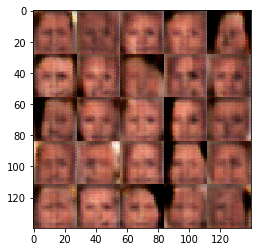

Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.4760
Epoch 1/1... Discriminator Loss: 1.1650... Generator Loss: 0.6635
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 1.6137... Generator Loss: 1.6144
Epoch 1/1... Discriminator Loss: 1.1586... Generator Loss: 0.8637
Epoch 1/1... Discriminator Loss: 0.8087... Generator Loss: 1.5076
Epoch 1/1... Discriminator Loss: 0.8794... Generator Loss: 1.1007
Epoch 1/1... Discriminator Loss: 1.0914... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.2003... Generator Loss: 0.9261
Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 0.5116
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 0.8827
Epoch 1/1... Discriminator Loss: 1.2880... Generator Loss: 0.5971
Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.7174
Epoch 1/1.

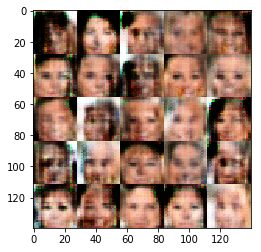

Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 1.7542
Epoch 1/1... Discriminator Loss: 1.2430... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.2905... Generator Loss: 0.8296
Epoch 1/1... Discriminator Loss: 1.5393... Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 1.2558
Epoch 1/1... Discriminator Loss: 1.0282... Generator Loss: 1.3239
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 0.8468... Generator Loss: 1.1238
Epoch 1/1... Discriminator Loss: 1.2547... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.5436
Epoch 1/1... Discriminator Loss: 1.3556... Generator Loss: 0.4884
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 1.2075
Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 2.0681... Generator Loss: 0.2295
Epoch 1/1... Discriminator Loss: 1.1847... Generator Loss: 0.7122
Epoch 1/1.

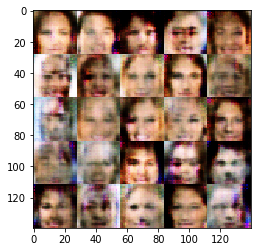

Epoch 1/1... Discriminator Loss: 0.5772... Generator Loss: 2.0266
Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 0.8667
Epoch 1/1... Discriminator Loss: 1.0754... Generator Loss: 0.9642
Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.7130
Epoch 1/1... Discriminator Loss: 1.0462... Generator Loss: 0.8642
Epoch 1/1... Discriminator Loss: 1.0035... Generator Loss: 0.8565
Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 0.6463
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 1.4510
Epoch 1/1... Discriminator Loss: 1.2822... Generator Loss: 1.9588
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 1.4384
Epoch 1/1... Discriminator Loss: 1.1009... Generator Loss: 0.8720
Epoch 1/1... Discriminator Loss: 1.5562... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 1.0088
Epoch 1/1... Discriminator Loss: 1.0304... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 1.8304... Generator Loss: 2.4044
Epoch 1/1.

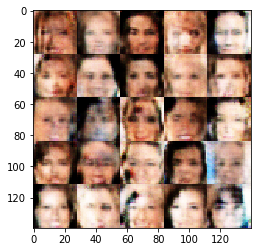

Epoch 1/1... Discriminator Loss: 1.0991... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.5575
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.9132
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.1063... Generator Loss: 1.0401
Epoch 1/1... Discriminator Loss: 1.1453... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.5796
Epoch 1/1... Discriminator Loss: 1.0236... Generator Loss: 0.7662
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 1.0674
Epoch 1/1... Discriminator Loss: 1.7623... Generator Loss: 0.2908
Epoch 1/1... Discriminator Loss: 0.9625... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 0.9692... Generator Loss: 0.9500
Epoch 1/1... Discriminator Loss: 0.9741... Generator Loss: 0.9751
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 1.7673
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 1.0632
Epoch 1/1.

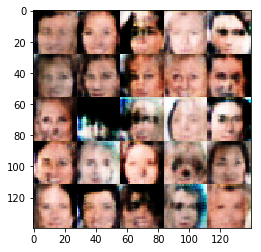

Epoch 1/1... Discriminator Loss: 1.5958... Generator Loss: 0.7589
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.4375
Epoch 1/1... Discriminator Loss: 1.5574... Generator Loss: 0.3732
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 1.7732
Epoch 1/1... Discriminator Loss: 1.1921... Generator Loss: 1.9489
Epoch 1/1... Discriminator Loss: 1.4473... Generator Loss: 1.1135
Epoch 1/1... Discriminator Loss: 1.2781... Generator Loss: 0.7366
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.4916
Epoch 1/1... Discriminator Loss: 1.2137... Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 1.5724
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 1.3116
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 1.0486
Epoch 1/1... Discriminator Loss: 1.1569... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 2.1492... Generator Loss: 0.1947
Epoch 1/1... Discriminator Loss: 1.5791... Generator Loss: 0.3759
Epoch 1/1.

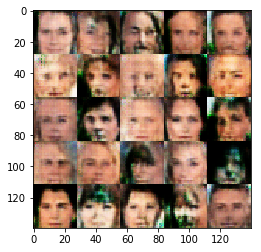

Epoch 1/1... Discriminator Loss: 0.9787... Generator Loss: 0.9236
Epoch 1/1... Discriminator Loss: 1.4557... Generator Loss: 0.5251
Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.6325
Epoch 1/1... Discriminator Loss: 1.4974... Generator Loss: 0.4172
Epoch 1/1... Discriminator Loss: 1.7332... Generator Loss: 0.3302
Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.7387
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 0.8948
Epoch 1/1... Discriminator Loss: 1.1141... Generator Loss: 1.3817
Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 1.2147
Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 1.2237... Generator Loss: 1.2662
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 0.5422
Epoch 1/1... Discriminator Loss: 1.1232... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.1163... Generator Loss: 0.7113
Epoch 1/1.

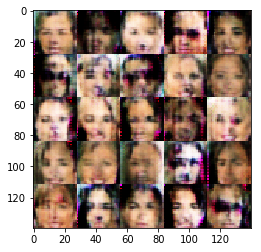

Epoch 1/1... Discriminator Loss: 1.6579... Generator Loss: 0.3531
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.5301
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.5526
Epoch 1/1... Discriminator Loss: 1.1067... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.8578
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 1.2064... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.2807... Generator Loss: 1.7683
Epoch 1/1... Discriminator Loss: 1.5226... Generator Loss: 1.6220
Epoch 1/1... Discriminator Loss: 1.0789... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.5688
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.7354
Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 0.9466
Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 0.8081
Epoch 1/1.

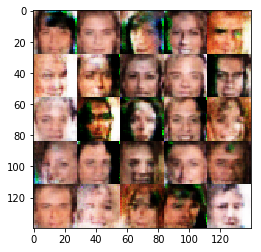

Epoch 1/1... Discriminator Loss: 1.6634... Generator Loss: 0.3403
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.5361
Epoch 1/1... Discriminator Loss: 1.5818... Generator Loss: 1.6684
Epoch 1/1... Discriminator Loss: 1.2138... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.0847... Generator Loss: 0.9758
Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.5855
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.5806
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 1.5705... Generator Loss: 0.4208
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 0.9584... Generator Loss: 0.8612
Epoch 1/1... Discriminator Loss: 1.3539... Generator Loss: 0.5597
Epoch 1/1... Discriminator Loss: 1.0660... Generator Loss: 0.7258
Epoch 1/1... Discriminator Loss: 1.5467... Generator Loss: 0.3835
Epoch 1/1... Discriminator Loss: 1.2668... Generator Loss: 0.6043
Epoch 1/1.

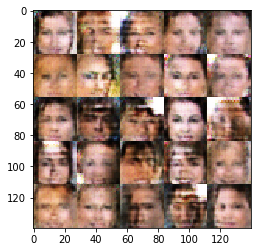

Epoch 1/1... Discriminator Loss: 0.7626... Generator Loss: 1.4090
Epoch 1/1... Discriminator Loss: 0.6773... Generator Loss: 1.4354
Epoch 1/1... Discriminator Loss: 0.6346... Generator Loss: 1.4486
Epoch 1/1... Discriminator Loss: 0.5727... Generator Loss: 1.6513
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 0.9096
Epoch 1/1... Discriminator Loss: 0.4587... Generator Loss: 2.2765
Epoch 1/1... Discriminator Loss: 2.1092... Generator Loss: 0.2820
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.4259... Generator Loss: 0.6970
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.7258
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.7608
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.8711
Epoch 1/1.

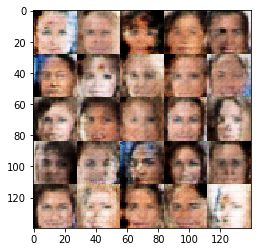

Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.8610
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.7823
Epoch 1/1... Discriminator Loss: 1.3561... Generator Loss: 0.8170
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.8003
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.7710
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.8375
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.7363
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.7995
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 0.8231
Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.6364
Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 1.3531
Epoch 1/1.

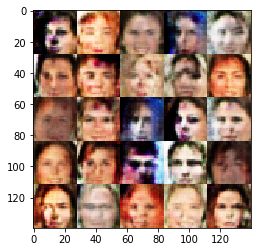

Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.7439
Epoch 1/1... Discriminator Loss: 1.5799... Generator Loss: 0.3604
Epoch 1/1... Discriminator Loss: 1.4482... Generator Loss: 0.7072
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.7940
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.9629
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 0.8475
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 1.7830... Generator Loss: 0.3249
Epoch 1/1... Discriminator Loss: 1.2508... Generator Loss: 0.8484
Epoch 1/1... Discriminator Loss: 1.2370... Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.5841... Generator Loss: 1.5160
Epoch 1/1... Discriminator Loss: 1.4826... Generator Loss: 0.5472
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 1.1880
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 0.7426
Epoch 1/1.

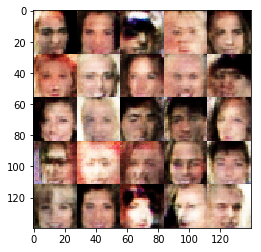

Epoch 1/1... Discriminator Loss: 2.0431... Generator Loss: 0.2476
Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.5102
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 0.9177
Epoch 1/1... Discriminator Loss: 1.2129... Generator Loss: 0.9163
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.8052
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.7850
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.2537... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.6605... Generator Loss: 0.3770
Epoch 1/1... Discriminator Loss: 1.0992... Generator Loss: 1.0868
Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 1.6887... Generator Loss: 0.3540
Epoch 1/1.

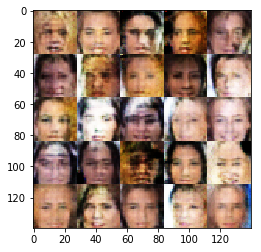

Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.5132
Epoch 1/1... Discriminator Loss: 1.5281... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.5530
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.6824
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 1.1689
Epoch 1/1... Discriminator Loss: 1.2780... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 1.1921... Generator Loss: 0.9848
Epoch 1/1... Discriminator Loss: 1.0856... Generator Loss: 0.9032
Epoch 1/1... Discriminator Loss: 1.1115... Generator Loss: 0.9209
Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 0.9920
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 1.1850
Epoch 1/1... Discriminator Loss: 1.1067... Generator Loss: 0.8901
Epoch 1/1... Discriminator Loss: 1.2472... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.8630
Epoch 1/1.

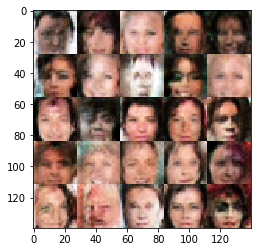

Epoch 1/1... Discriminator Loss: 1.5304... Generator Loss: 0.4344
Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.4462... Generator Loss: 0.5235
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.6216
Epoch 1/1... Discriminator Loss: 1.5264... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 0.6164
Epoch 1/1... Discriminator Loss: 1.0270... Generator Loss: 0.9909
Epoch 1/1... Discriminator Loss: 1.5419... Generator Loss: 0.5845
Epoch 1/1... Discriminator Loss: 1.0913... Generator Loss: 0.9002
Epoch 1/1... Discriminator Loss: 1.2499... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.2583... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.9211
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 1.4615
Epoch 1/1... Discriminator Loss: 1.2437... Generator Loss: 0.8599
Epoch 1/1.

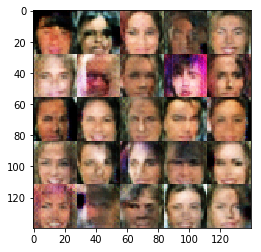

Epoch 1/1... Discriminator Loss: 1.5558... Generator Loss: 0.4196
Epoch 1/1... Discriminator Loss: 1.5208... Generator Loss: 0.5255
Epoch 1/1... Discriminator Loss: 1.0524... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 0.9815... Generator Loss: 1.1233
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.8724
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.5211... Generator Loss: 0.4110
Epoch 1/1... Discriminator Loss: 1.1530... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 0.8558
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.5755
Epoch 1/1... Discriminator Loss: 1.7275... Generator Loss: 0.3575
Epoch 1/1... Discriminator Loss: 1.4979... Generator Loss: 0.5244
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.9261
Epoch 1/1.

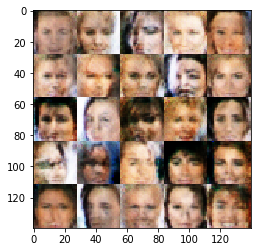

Epoch 1/1... Discriminator Loss: 1.5937... Generator Loss: 0.3965
Epoch 1/1... Discriminator Loss: 1.6700... Generator Loss: 0.3518
Epoch 1/1... Discriminator Loss: 1.1973... Generator Loss: 1.2685
Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.0544... Generator Loss: 1.1251
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 1.0098... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 1.5414... Generator Loss: 0.4642
Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.2367... Generator Loss: 0.8116
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.5040
Epoch 1/1... Discriminator Loss: 1.6108... Generator Loss: 0.4847
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.8439
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.7294
Epoch 1/1.

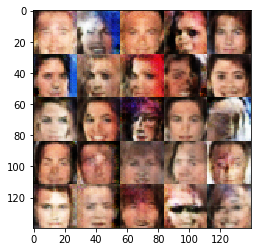

Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 0.8453
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 1.1971... Generator Loss: 0.8873
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.4930
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 1.3868
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.5416
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 0.8130
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.5572
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.2377... Generator Loss: 0.8324
Epoch 1/1... Discriminator Loss: 1.6664... Generator Loss: 0.3864
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.6226
Epoch 1/1... Discriminator Loss: 1.2692... Generator Loss: 0.7087
Epoch 1/1.

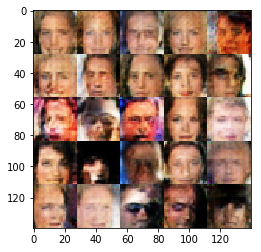

Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.7387
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.1950... Generator Loss: 0.9151
Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 0.9381
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 1.2198
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.6030
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 0.7639
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.8696
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 1.0763
Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.4721
Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.6518
Epoch 1/1.

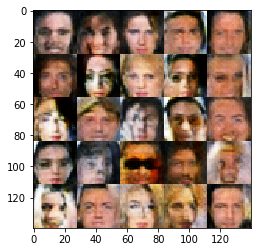

Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.5102... Generator Loss: 0.4802
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.5941
Epoch 1/1... Discriminator Loss: 1.5302... Generator Loss: 0.4428
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.5786
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.1040... Generator Loss: 0.8122
Epoch 1/1... Discriminator Loss: 1.2327... Generator Loss: 0.8467
Epoch 1/1... Discriminator Loss: 1.4305... Generator Loss: 0.5952
Epoch 1/1... Discriminator Loss: 1.2259... Generator Loss: 0.8631
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.5824
Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 1.0320
Epoch 1/1... Discriminator Loss: 1.2777... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.9379
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.5733
Epoch 1/1.

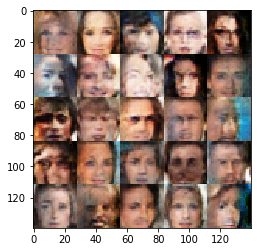

Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.7466
Epoch 1/1... Discriminator Loss: 1.5057... Generator Loss: 0.5194
Epoch 1/1... Discriminator Loss: 1.0835... Generator Loss: 0.8365
Epoch 1/1... Discriminator Loss: 1.4604... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.7833
Epoch 1/1... Discriminator Loss: 1.1312... Generator Loss: 0.8457
Epoch 1/1... Discriminator Loss: 1.2152... Generator Loss: 0.9070
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.0945... Generator Loss: 0.9560
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.9731
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.5904
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.4916
Epoch 1/1.

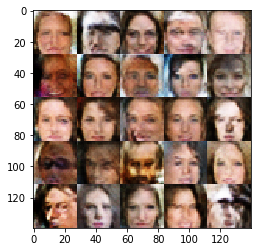

Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 1.2725... Generator Loss: 0.8869
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 1.1262
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6199
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 1.4506... Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 1.1509... Generator Loss: 0.6715
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.2114... Generator Loss: 0.9072
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 0.8820
Epoch 1/1... Discriminator Loss: 1.4238... Generator Loss: 0.5649
Epoch 1/1.

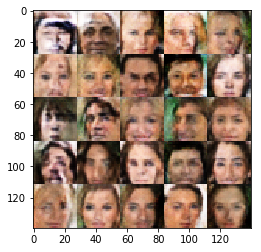

Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 1.0365
Epoch 1/1... Discriminator Loss: 1.5269... Generator Loss: 0.4532
Epoch 1/1... Discriminator Loss: 1.5108... Generator Loss: 0.4785
Epoch 1/1... Discriminator Loss: 1.1204... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.4690... Generator Loss: 0.5451
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 1.0749
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 0.9861
Epoch 1/1... Discriminator Loss: 1.5130... Generator Loss: 0.5440
Epoch 1/1... Discriminator Loss: 1.5891... Generator Loss: 0.4473
Epoch 1/1... Discriminator Loss: 1.2197... Generator Loss: 0.7080
Epoch 1/1... Discriminator Loss: 1.2442... Generator Loss: 0.7870
Epoch 1/1... Discriminator Loss: 1.5922... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.6942
Epoch 1/1.

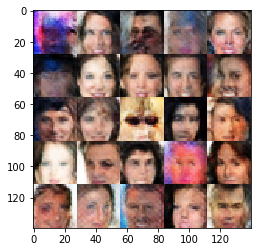

Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.6757
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.9955
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.7477
Epoch 1/1... Discriminator Loss: 1.4368... Generator Loss: 0.5346
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.2297... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.2303... Generator Loss: 0.7689
Epoch 1/1... Discriminator Loss: 1.4945... Generator Loss: 0.4902
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 0.8077
Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 0.5351
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.5553
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.4634
Epoch 1/1.

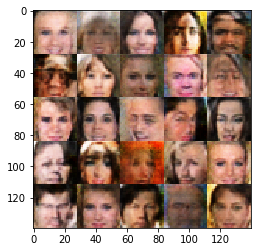

Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.8428
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.2280... Generator Loss: 0.7522
Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.8232
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.5587
Epoch 1/1... Discriminator Loss: 1.0554... Generator Loss: 1.0328
Epoch 1/1... Discriminator Loss: 1.1098... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.2277... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.6277


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0006
beta1 = 0.2

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.